In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\Abhik\\Desktop\\cell_images\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\Abhik\\Desktop\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
para_cell

'C:\\Users\\Abhik\\Desktop\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

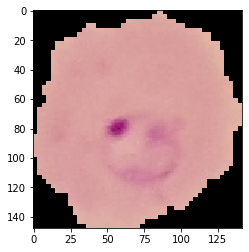

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
uninfected_cell

'C:\\Users\\Abhik\\Desktop\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [18]:
uninfected_cell = imread(uninfected_cell)

In [19]:
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

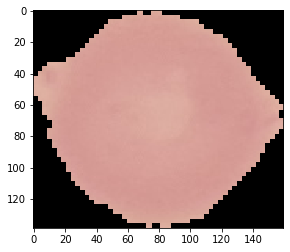

In [20]:
plt.imshow(uninfected_cell)

In [21]:
pwd

'C:\\Users\\Abhik\\Desktop\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs'

In [22]:
len(os.listdir(train_path+'parasitized'))

12480

In [23]:
len(os.listdir(train_path+'uninfected'))

12480

In [24]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

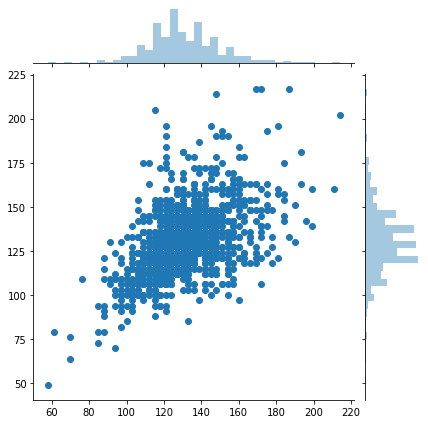

In [25]:
sns.jointplot(dim1,dim2)

In [26]:
np.mean(dim1)

130.92538461538462

In [27]:
np.mean(dim2)

130.75

In [28]:
image_shape = (130,130,3)

In [29]:
28*28

784

In [30]:
32*32*3

3072

In [31]:
130*130*3

50700

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

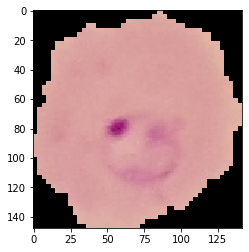

In [36]:
para_img = imread(para_cell)
plt.imshow(para_img)

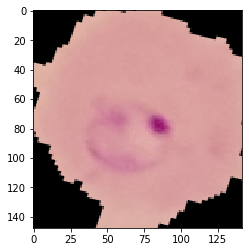

In [39]:
plt.imshow(image_gen.random_transform(para_img))

In [40]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [41]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [42]:
from tensorflow.keras.models import Sequential

In [44]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [45]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [49]:
batch_size = 16

In [51]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                               class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [52]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                               class_mode = 'binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [53]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [55]:
#results = model.fit_generator(train_image_gen,epochs=20,
#                             validation_data=test_image_gen,
#                            callbacks=[early_stop])

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model = load_model('malaria_detector.h5')

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [59]:
model.evaluate_generator(test_image_gen)

[1.8933356607713037, 0.8753846]

In [62]:
model.metrics_names

['loss', 'accuracy']

In [64]:
pred = model.predict_generator(test_image_gen)

In [65]:
predictions = pred >  0.5

In [66]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1300
           1       0.97      0.78      0.87      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.88      2600
weighted avg       0.89      0.88      0.88      2600



In [70]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1272,   28],
       [ 286, 1014]], dtype=int64)

In [71]:
para_cell

'C:\\Users\\Abhik\\Desktop\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [72]:
from tensorflow.keras.preprocessing import image

In [74]:
my_image = image.load_img(para_cell,target_size=image_shape)

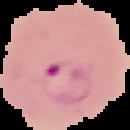

In [75]:
my_image

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [79]:
my_img_arr = image.img_to_array(my_image)

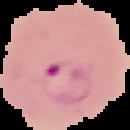

In [80]:
my_image

In [81]:
my_img_arr.shape

(130, 130, 3)

In [82]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [83]:
my_img_arr.shape

(1, 130, 130, 3)

In [84]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [85]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [89]:
#End_______